# K-MEANS
K均值算法是一个迭代过程，它不断地细化细化均值，直到均值收敛
令 ${z_1,z_2,...,z_q}$ 是向量观测集合。

在图像分割中，向量$z$的每一个分量表示一个数值像素属性。例如，诺分割只基于灰度尺度灰度值，则$z = $z 是一个表示灰度的标量。如果我们正在分割RGB彩色图像，那么$z$通常是一个三维向量。k均值聚类的目的是将观测集合Q划分为k个满足如下最优准则的不相交的聚类集合 $C= {C_1,C_2,...,C_k}$:
$$
    argmin_c [\sum_{i=1}^{k}\sum_{z=C_i}||z-m_i||^2]
$$
式中$m_i$是集合$C_i$中样本的均值向量，$||arg||$是参数的向量范数。通常使用欧几里德范数。这个公式说，我们感兴趣的是找到集合$C$，集合中的每个点到该集合的均值距离之和最小的。

遗憾的是，求这个极小值是一个NP困难问题，因为这个问题实际上无解。

于是这些年来人们提出了一些启发式方法，以便试图找到一些极小的近似

这一算法如下：

1. 初始化：规定一组初始均值$m_i , i=1,2,3...,k$ 

2. 将样本分配给聚类：将每个样本分配给均值最接近的聚类集合（关系被任意求解，但样本只分配给一个聚类）：
    $z_q\rightarrow C_i$  如果$||z_q - m_i||^2 < ||z_q - m_j||^2$,$j=1,2,...k (j\neq i)$

3. 更新聚类中心(均值)：
$$
    m_i = \frac{1}{|C_i|}\sum_{z=C_i},i=1,2,...k
$$

4.完备性验证：计算当前步骤和前几步中平均向量之间的欧几里德范数。计算残差$E$，即K个范数之和。诺$E\le T$,其中T是一个规定非负阈值，则停止。否则回到步骤2

In [4]:
import numpy as np 
import matplotlib.pyplot as plt

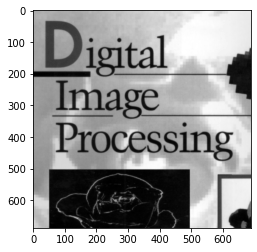

In [5]:
f = plt.imread("./../images/book-cover.tif")
plt.imshow(f, "gray")